In [ ]:
'''Este es el primer planteamiento para tratar los NaN's de las estadisticas de los jugadores. Implementamos el algortitmo k-means para poder separar a los jugadores
en diferentes categorías según la media de sus puntos de ranking durante la temporada. Entonces, para cada jugador que no tenga estadísticas, se le seleccionará como
estadísticas el vector medio de todos los vectores de los demás jugadores de su categoría.'''

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('atp_matches_2023.csv')
dataset.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,...,62.0,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,...,12.0,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,...,62.0,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,...,41.0,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,...,58.0,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0


In [3]:
dataset_r = pd.read_csv('atp_rankings_20s.csv')
dataset_r.head()

,ranking_date,rank,player,points
0,20200106,1,104745,9985
1,20200106,2,104925,9055
2,20200106,3,103819,6590
3,20200106,4,106233,5825
4,20200106,5,106421,5705


In [4]:
# Asegurarse de que 'player' y 'points' son del tipo correcto
dataset_r['player'] = dataset_r['player'].astype(int)
dataset_r['points'] = dataset_r['points'].astype(float)

# Agrupar por 'player' y calcular la media de 'points'
media_puntos = dataset_r.groupby('player')['points'].mean()

# Convertir la Serie resultante en un DataFrame
df_media_puntos = media_puntos.reset_index()

# Renombrar las columnas
df_media_puntos.columns = ['jugador', 'media_puntos']

In [5]:
X = df_media_puntos['media_puntos'].values.reshape(-1, 1)

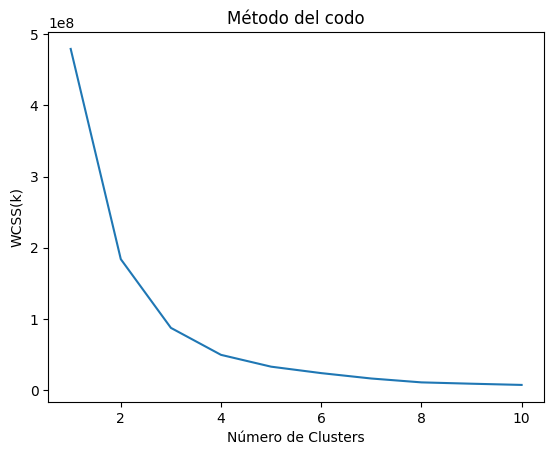

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 4, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

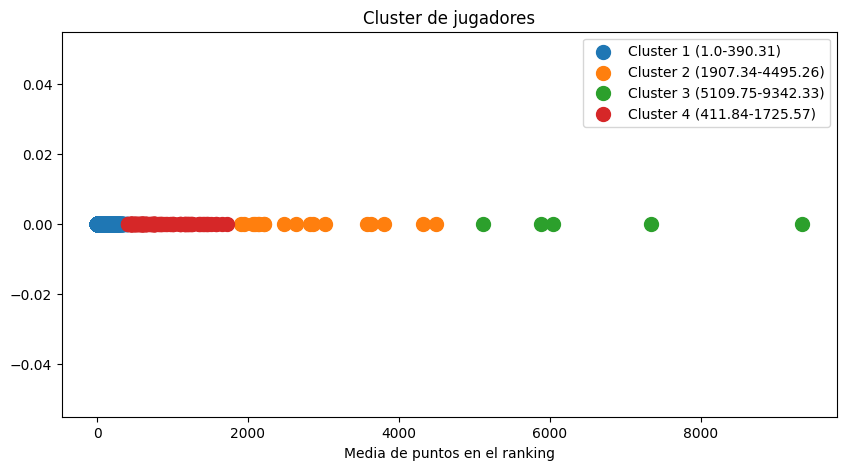

In [11]:
# Calcular los valores mínimos y máximos de los puntos para cada cluster
min_puntos = [X[y_kmeans == i].min() for i in range(4)]
max_puntos = [X[y_kmeans == i].max() for i in range(4)]

# Crear las etiquetas para los clusters
labels = [f"Cluster {i+1} ({np.round(min_puntos[i], 2)}-{np.round(max_puntos[i], 2)})" for i in range(4)]

# Crear el gráfico de dispersión con las nuevas etiquetas
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.scatter(X[y_kmeans == i], [0]*len(X[y_kmeans == i]), s = 100, label = labels[i])
# plt.scatter(kmeans.cluster_centers_, [0]*len(kmeans.cluster_centers_), s = 300, c = "yellow", label = "Baricentros")
plt.title("Cluster de jugadores")
plt.xlabel("Media de puntos en el ranking")
plt.legend()
plt.show()
